In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prices = np.loadtxt('prices.txt')

prices_pd = pd.DataFrame(prices)

In [12]:
prices_pd[[0]]

,0
0,40.44
1,40.58
2,40.52
3,40.47
4,40.23
...,...
245,43.80
246,43.87
247,43.66
248,43.61


In [3]:
ema = prices_pd.ewm(span=30, adjust=False).mean()

trading_positions_raw = prices_pd - ema
trading_positions = trading_positions_raw.apply(np.sign) * 10
    # .apply(np.sign): converts -tive to -1 and +tive to 1

trading_positions_final = trading_positions.shift(1)
currentPos = trading_positions_final.iloc[-1:]

currentPos = currentPos.replace({np.nan: 0}).to_numpy()[0]

In [4]:
currentPos

array([ 10.,   0., -10.,  10., -10.,  10., -10., -10., -10., -10., -10.,
        10.,  10., -10.,  10., -10., -10.,  10.,  10.,  10.,  10., -10.,
       -10., -10.,  10., -10., -10., -10.,  10., -10.,  10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10.,  10., -10.,  10., -10.,
       -10.,  10.,  10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10.,  10.,  10., -10.,  10., -10.,  10., -10., -10.,
       -10.,  10., -10., -10., -10., -10.,  10., -10., -10., -10., -10.,
       -10., -10.,  10., -10., -10., -10.,  10., -10., -10., -10.,  10.,
        10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,  10.,
        10.])

In [5]:
ema5 = prices_pd.ewm(span=5, adjust=False).mean()
ema20 = prices_pd.ewm(span=20, adjust=False).mean()
ema50 = prices_pd.ewm(span=50, adjust=False).mean()
ema100 = prices_pd.ewm(span=100, adjust=False).mean()

In [6]:
BUY = 10
SELL = -10
buy_signals = ema5.gt(ema20) & (prices_pd.gt(ema50) & ema5.gt(ema50) & ema20.gt(ema50))
sell_signals = ema5.lt(ema20) # & (prices_pd.lt(ema50) & ema5.lt(ema50) & ema20.lt(ema50))

buy_signals = buy_signals.replace({True: 1, False: 0})
sell_signals = sell_signals.replace({True: -1, False: 0})

trading_positions_final2 = (buy_signals + sell_signals) * 5

In [7]:
trading_positions_final2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,-5,0,...,0,0,0,0,5,0,0,0,0,0
2,0,0,5,0,0,5,0,0,-5,0,...,0,0,0,0,5,0,0,0,0,0
3,0,0,0,0,0,5,0,0,-5,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,5,5,0,0,-5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5,0,-5,0,-5,5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,5,0
246,5,0,-5,0,-5,5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,5,0
247,5,0,-5,5,-5,5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,5,0
248,5,0,-5,5,-5,5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,5,0


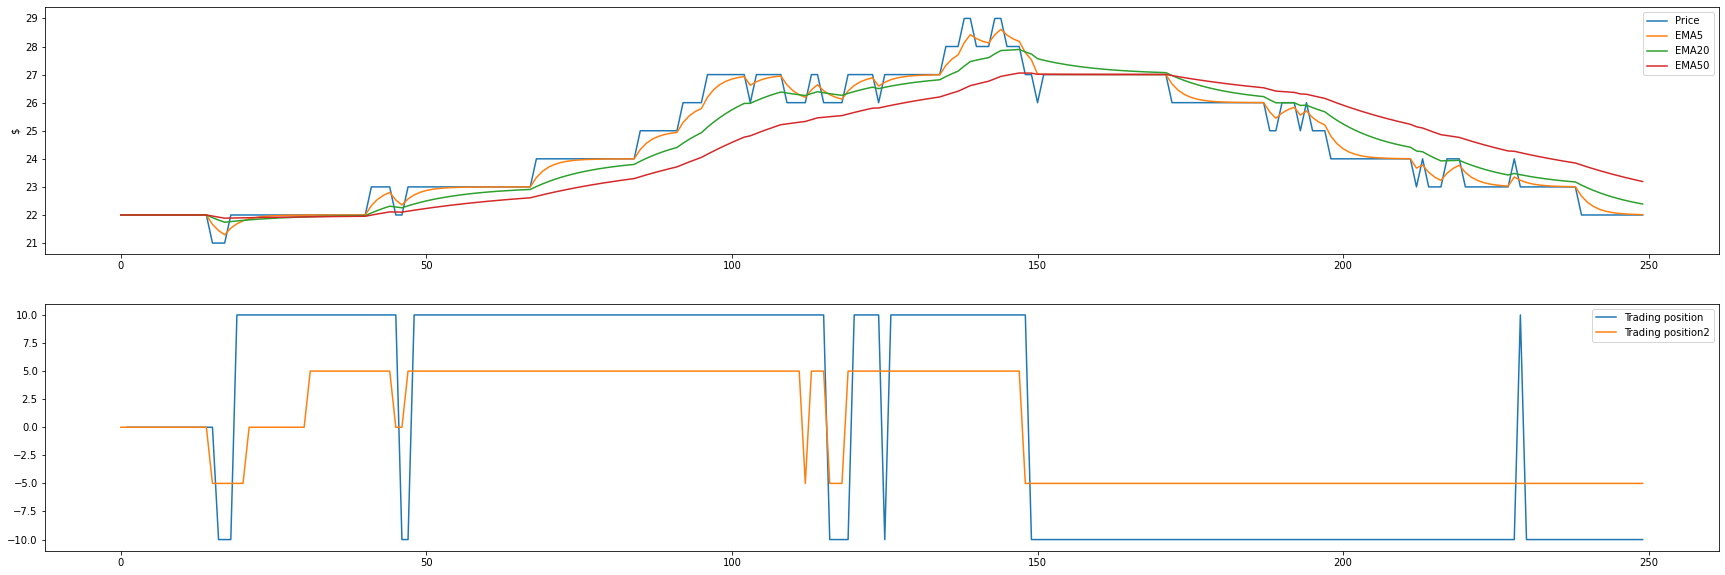

In [8]:
stocks = [50]
for stock in stocks:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,10))

    ax1.plot(prices_pd[stock].index, prices_pd[stock], label='Price')
    ax1.plot(ema5[stock].index, ema5[stock], label = 'EMA5')
    ax1.plot(ema20[stock].index, ema20[stock], label = 'EMA20')
    ax1.plot(ema50[stock].index, ema50[stock], label = 'EMA50')
    # ax1.plot(buy_signals[stock].index, buy_signals[stock], color = 'green', label = 'Buy', marker = '^', alpha = 1)
    # ax1.plot(sell_signals[stock].index, sell_signals[stock], color = 'red', label = 'Sell', marker = 'v', alpha = 1) 
    #   ax1.plot(ema120[stock].index, ema120[stock], label = 'EMA120')

    ax1.set_ylabel('$')
    ax1.legend(loc='best')

    # ax2.plot(buy_signals[stock].index, buy_signals[stock], label='Buy')
    # ax2.plot(sell_signals[stock].index, sell_signals[stock], label='Sell')
    ax2.plot(trading_positions_final[stock].index, trading_positions_final[stock], label='Trading position')
    ax2.plot(trading_positions_final2[stock].index, trading_positions_final2[stock], label='Trading position2')
    ax2.legend(loc='best')

    # ax2.set_ylabel('Trading position')

In [ ]:
# OLD
    # ema = stock_prices_df.ewm(span=100, adjust=False).mean()

    # trading_positions_raw = stock_prices_df - ema
    # trading_positions = trading_positions_raw.apply(np.sign) * 10
    # trading_positions_final = trading_positions.shift(1)
    # new_positions = trading_positions_final.iloc[-1:].fillna(0)

    # # update current position
    # for i in new_positions.columns:
    #     curr_pos[i] = new_positions[i].iloc[-1]

    # return curr_pos